# Decision Tree
Version 1: 2019/04/05  
Using an algorithm in Sklearn (CART), we generate a decision tree as follows:

First, we should import the required modules as follows:

In [1]:
import sklearn.datasets as datasets
from sklearn import tree, metrics, model_selection, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option

# Load the Iris Data

In [2]:
df = pd.read_csv('Data/iris.csv')
df.shape

(150, 5)

In [3]:
# set_option('precision', 2)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Using the following code, one can convert the target column to Numeric
df['class_label']= pd.factorize(df['species'])[0]
# df['class_label'], _= pd.factorize(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
feature=["sepal_length", "sepal_width", "petal_length", "petal_width"]
X=df[feature]
# y=df["species"]
y=df["class_label"]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_label, dtype: int64

In [10]:
correlations = df.corr(method='pearson')
print(correlations)

              sepal_length  sepal_width  petal_length  petal_width  \
sepal_length      1.000000    -0.117570      0.871754     0.817941   
sepal_width      -0.117570     1.000000     -0.428440    -0.366126   
petal_length      0.871754    -0.428440      1.000000     0.962865   
petal_width       0.817941    -0.366126      0.962865     1.000000   
class_label       0.782561    -0.426658      0.949035     0.956547   

              class_label  
sepal_length     0.782561  
sepal_width     -0.426658  
petal_length     0.949035  
petal_width      0.956547  
class_label      1.000000  


## Make Train and Test Sets

In [11]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

## Standardize the Features

In [12]:
# Is it necessary to convert the features in Decision Tree? 
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

## Tain the Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualize

In [14]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

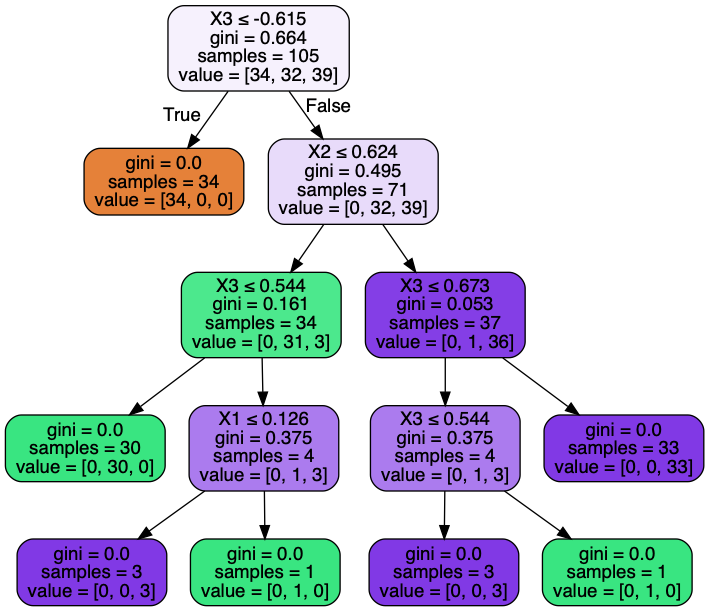

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Make predictions

Now, one can use this model to predict the test data

In [16]:
y_pred = clf.predict(X_test)

## Evaluate the Model

In [17]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


## Visualize the Model's Decision Regions

In [18]:
feature_selected=["petal_length", "petal_width"]
X=df[feature_selected]
y=df["class_label"]

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
X=np.array(X)
y=np.array(y)

In [21]:
X.shape

(150, 2)

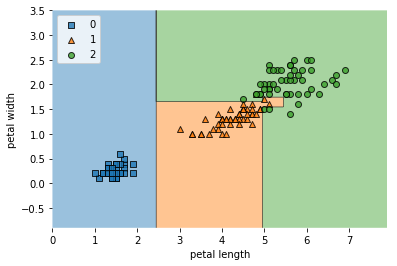

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf, legend=2)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()